# Project Title
# Luminous India Trade Data Analysis (2022)

## Project Description

This notebook analyzes 1 million records of India's international trade data from 2022, covering both **imports** and **exports**. The dataset includes details like product names, trading partner countries, ports, quantity, trade value (INR), and currency exchange rates.

Using **Python**, we explore key patterns in trade flow, identify top products, countries, and ports, analyze currency trends, and calculate trade imbalances.

---

## Objectives

- Clean and transform raw trade data for analysis
- Identify top trading countries, products, and ports
- Analyze import vs export trends over time
- Detect outliers and high-value transactions
- Visualize currency rate fluctuations
- Export cleaned data and summary reports for business insights

---

## Dataset Overview

| Column         | Description                             |
|----------------|-----------------------------------------|
| `Date`         | Date of trade                           |
| `HS_Code`      | Harmonized System product code          |
| `Product`      | Product name                            |
| `Direction`    | Import or Export                        |
| `Quantity`     | Quantity traded                         |
| `Value_INR`    | Trade value in Indian Rupees            |
| `Port`         | Port of entry/exit                      |
| `Country`      | Trading partner country                 |
| `Currency_Rate`| INR to foreign currency exchange rate   |

---

## Tools Used

- Python 🐍
- Pandas 📊
- Matplotlib & Seaborn 📈
- Jupyter Notebook 📓

---

##  Final Deliverables

- Cleaned dataset (`cleaned_luminous_trade_data.csv`)
- Summary reports (Product, Country)
- Visualizations for trends and insights
- Exportable CSVs for Excel/Power BI dashboards

---


#  Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [3]:
df = pd.read_csv("luminous_trade_data.csv")
df

,Date,HS_Code,Product,Direction,Quantity,Value_INR,Port,Country,Currency_Rate
0,2022-01-01 00:00:00,850440,Solar Panel,Import,88,4171263,Kolkata,Germany,78.33
1,2022-01-01 00:01:00,850440,Solar Panel,Import,69,2126920,Mundra,China,71.49
2,2022-01-01 00:02:00,850780,Battery Charger,Import,80,942853,Kolkata,Bangladesh,70.03
3,2022-01-01 00:03:00,850780,Battery Charger,Import,8,2460477,Mundra,Bangladesh,80.31
4,2022-01-01 00:04:00,850780,Solar Panel,Import,709,4617296,Mundra,Germany,83.74
...,...,...,...,...,...,...,...,...,...
999995,2023-11-26 10:35:00,850780,UPS Battery,Export,164,810840,Chennai,Germany,73.32
999996,2023-11-26 10:36:00,850720,UPS Battery,Export,736,4590586,Nhava Sheva,UAE,74.90
999997,2023-11-26 10:37:00,850780,Inverter,Import,416,2926102,Nhava Sheva,Bangladesh,73.68
999998,2023-11-26 10:38:00,850431,UPS Battery,Export,880,3176456,Mundra,Germany,80.65


In [4]:
# Display first 5 rows
df.head()

,Date,HS_Code,Product,Direction,Quantity,Value_INR,Port,Country,Currency_Rate
0,2022-01-01 00:00:00,850440,Solar Panel,Import,88,4171263,Kolkata,Germany,78.33
1,2022-01-01 00:01:00,850440,Solar Panel,Import,69,2126920,Mundra,China,71.49
2,2022-01-01 00:02:00,850780,Battery Charger,Import,80,942853,Kolkata,Bangladesh,70.03
3,2022-01-01 00:03:00,850780,Battery Charger,Import,8,2460477,Mundra,Bangladesh,80.31
4,2022-01-01 00:04:00,850780,Solar Panel,Import,709,4617296,Mundra,Germany,83.74


# Convert 'Date' Column to Datetime Format

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Check new dtype
df['Date'].dtype

dtype('<M8[ns]')

# Check for Missing Values

In [6]:
df.isnull().sum()

Date             0
HS_Code          0
Product          0
Direction        0
Quantity         0
Value_INR        0
Port             0
Country          0
Currency_Rate    0
dtype: int64

# Basic Data Types Check

In [7]:
df.dtypes

Date             datetime64[ns]
HS_Code                   int64
Product                  object
Direction                object
Quantity                  int64
Value_INR                 int64
Port                     object
Country                  object
Currency_Rate           float64
dtype: object

# Basic Statistical Summary

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1000000,2022-12-14 05:19:30.000001536,2022-01-01 00:00:00,2022-06-23 14:39:45,2022-12-14 05:19:30,2023-06-05 19:59:15,2023-11-26 10:39:00,NaN
HS_Code,1000000.0,850592.788326,850431.0,850440.0,850720.0,850780.0,850780.0,158.713216
Quantity,1000000.0,500.20195,1.0,251.0,500.0,750.0,999.0,288.4412
Value_INR,1000000.0,2523911.203862,50001.0,1285901.75,2523818.0,3760793.0,4999996.0,1428579.681529
Currency_Rate,1000000.0,77.505637,70.0,73.76,77.51,81.26,85.0,4.331438


# Exploratory Data Analysis (EDA)

# Top 5 Traded Products

In [9]:
print(df['Product'].value_counts().head())

Product
Inverter           250481
Battery Charger    249981
UPS Battery        249889
Solar Panel        249649
Name: count, dtype: int64


# Total Import vs Export Count

Direction
Import    500788
Export    499212
Name: count, dtype: int64


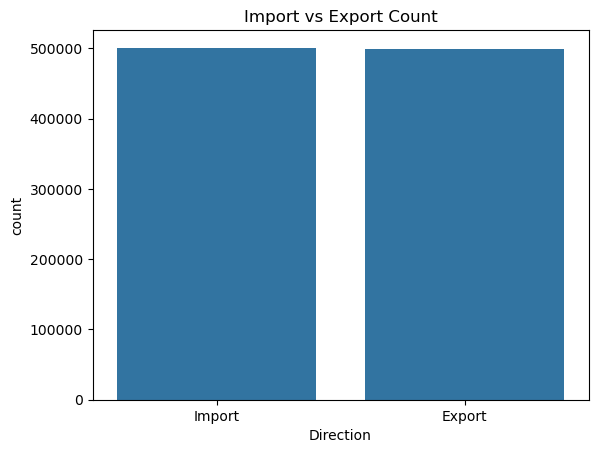

In [10]:
print(df['Direction'].value_counts())

# Plot
sns.countplot(data=df, x='Direction')
plt.title("Import vs Export Count")
plt.show()

# Top Trading Countries

Country
Bangladesh    200329
China         200234
Germany       200194
USA           199759
UAE           199484
Name: count, dtype: int64


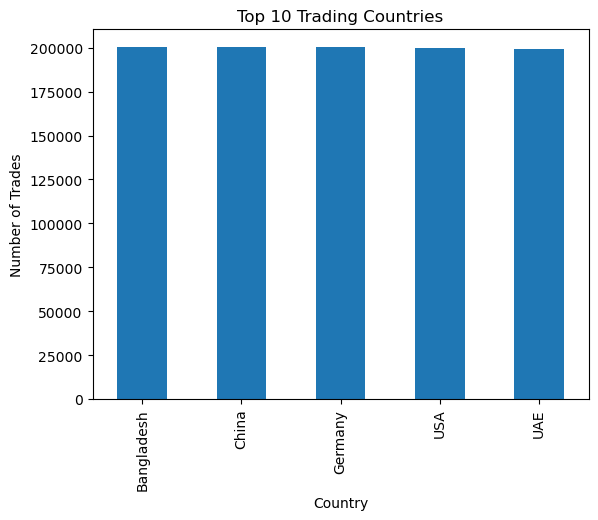

In [11]:
top_countries = df['Country'].value_counts().head(10)
print(top_countries)

# Plot
top_countries.plot(kind='bar', title='Top 10 Trading Countries')
plt.xlabel("Country")
plt.ylabel("Number of Trades")
plt.show()

# Monthly Trade Volume Over Time

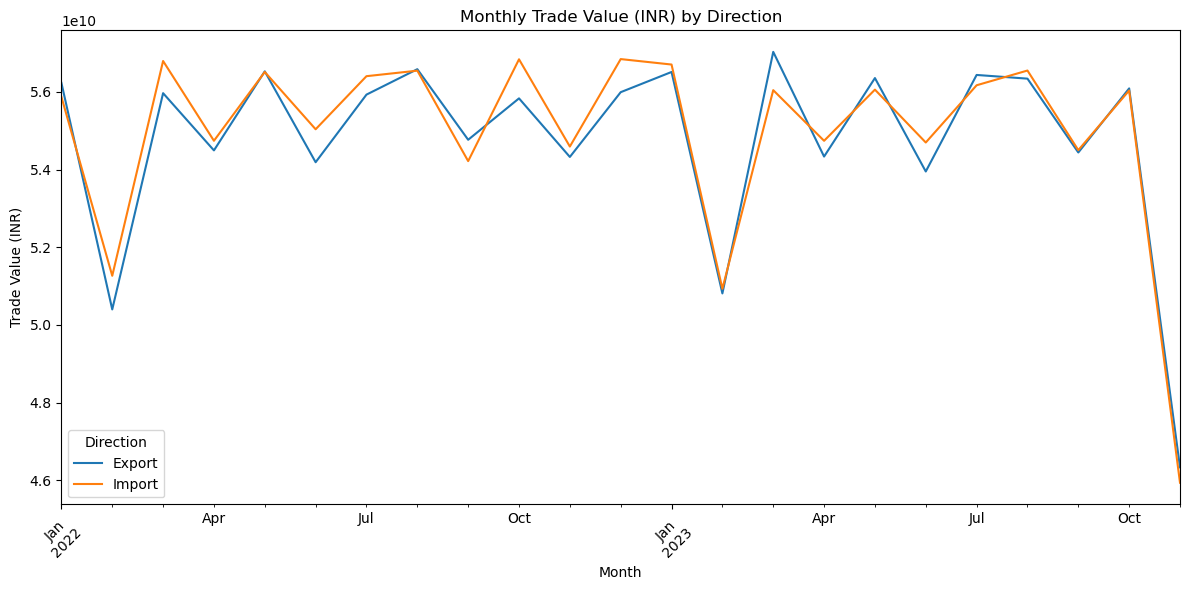

In [12]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_volume = df.groupby(['Month', 'Direction'])['Value_INR'].sum().unstack()

# Plot
monthly_volume.plot(figsize=(12, 6))
plt.title("Monthly Trade Value (INR) by Direction")
plt.ylabel("Trade Value (INR)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Port-wise Analysis

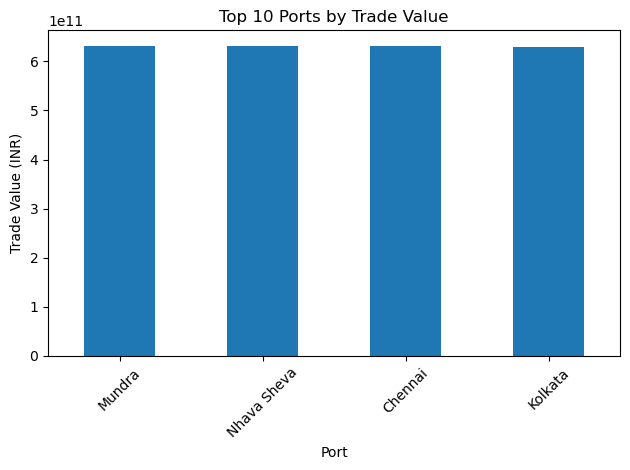

In [13]:
port_summary = df.groupby('Port')['Value_INR'].sum().sort_values(ascending=False).head(10)

# Plot
port_summary.plot(kind='bar', title='Top 10 Ports by Trade Value')
plt.ylabel("Trade Value (INR)")
plt.xlabel("Port")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save Cleaned Data

In [14]:
df.to_csv("cleaned_luminous_trade_data.csv", index=False)

# Advanced Analysis

# Top 10 High Value Trades

In [15]:
# Top 10 highest value trades
high_value_trades = df.sort_values(by='Value_INR', ascending=False).head(10)
print(high_value_trades[['Date', 'Product', 'Country', 'Value_INR', 'Direction']])

                      Date          Product     Country  Value_INR Direction
921839 2023-10-03 03:59:00      UPS Battery  Bangladesh    4999996    Import
18834  2022-01-14 01:54:00  Battery Charger  Bangladesh    4999995    Import
731169 2023-05-23 18:09:00  Battery Charger  Bangladesh    4999991    Import
749940 2023-06-05 19:00:00      Solar Panel  Bangladesh    4999987    Export
440674 2022-11-03 00:34:00      Solar Panel  Bangladesh    4999981    Import
75898  2022-02-22 16:58:00      Solar Panel         USA    4999979    Export
968660 2023-11-04 16:20:00      Solar Panel         UAE    4999979    Import
547755 2023-01-16 09:15:00  Battery Charger         USA    4999973    Export
232143 2022-06-11 05:03:00  Battery Charger       China    4999968    Import
148310 2022-04-13 23:50:00      Solar Panel         USA    4999963    Export


# Total Trade Value by Country (Import vs Export)

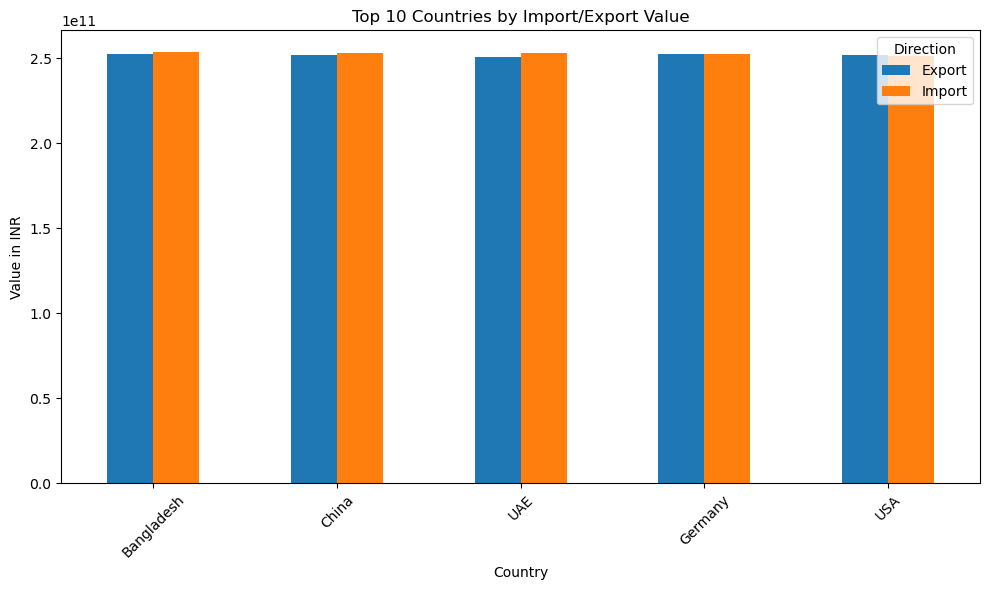

In [16]:
# Pivot for import/export value by country
country_trade_value = df.groupby(['Country', 'Direction'])['Value_INR'].sum().unstack().fillna(0)

# Plot
country_trade_value.sort_values(by='Import', ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Countries by Import/Export Value")
plt.ylabel("Value in INR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trade Imbalance (Export - Import) per Country

Country
UAE          -2116048161
Bangladesh   -1371157701
China        -1207463300
Germany       -287660110
USA            819607220
Name: Trade_Imbalance, dtype: int64


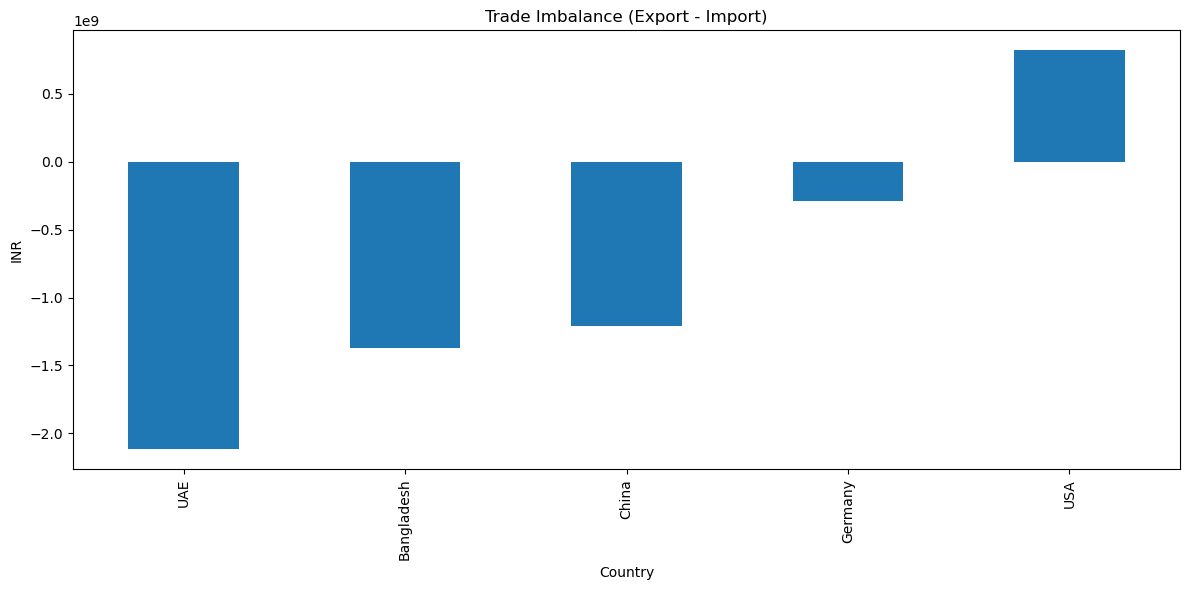

In [17]:
# Calculate export-import difference
country_trade_value['Trade_Imbalance'] = country_trade_value.get('Export', 0) - country_trade_value.get('Import', 0)

# Sort and display
imbalance_sorted = country_trade_value['Trade_Imbalance'].sort_values()
print(imbalance_sorted)

# Plot
imbalance_sorted.plot(kind='bar', title='Trade Imbalance (Export - Import)', figsize=(12,6))
plt.ylabel("INR")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Currency Rate Trend Over Time

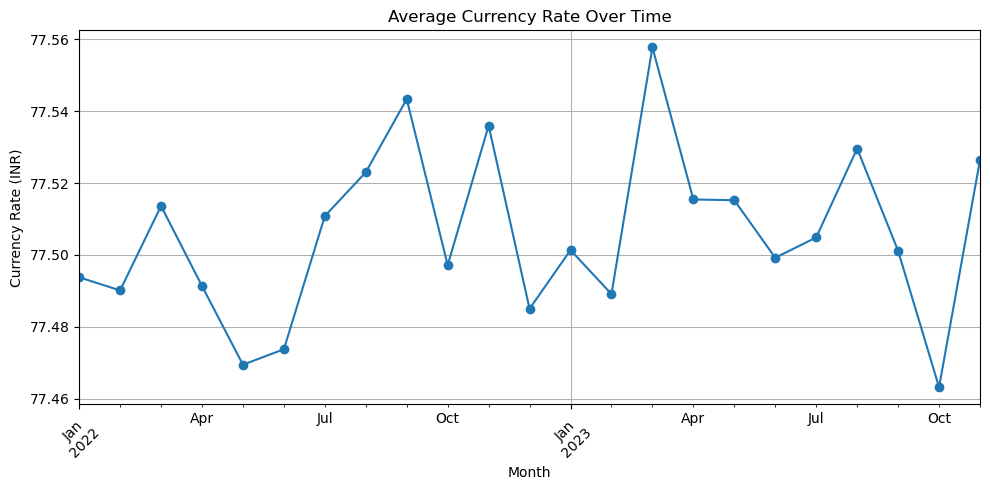

In [18]:
# Average currency rate per month
currency_trend = df.groupby(df['Date'].dt.to_period('M'))['Currency_Rate'].mean()

# Plot
currency_trend.plot(kind='line', marker='o', title='Average Currency Rate Over Time', figsize=(10,5))
plt.ylabel("Currency Rate (INR)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Most Used Ports per Direction

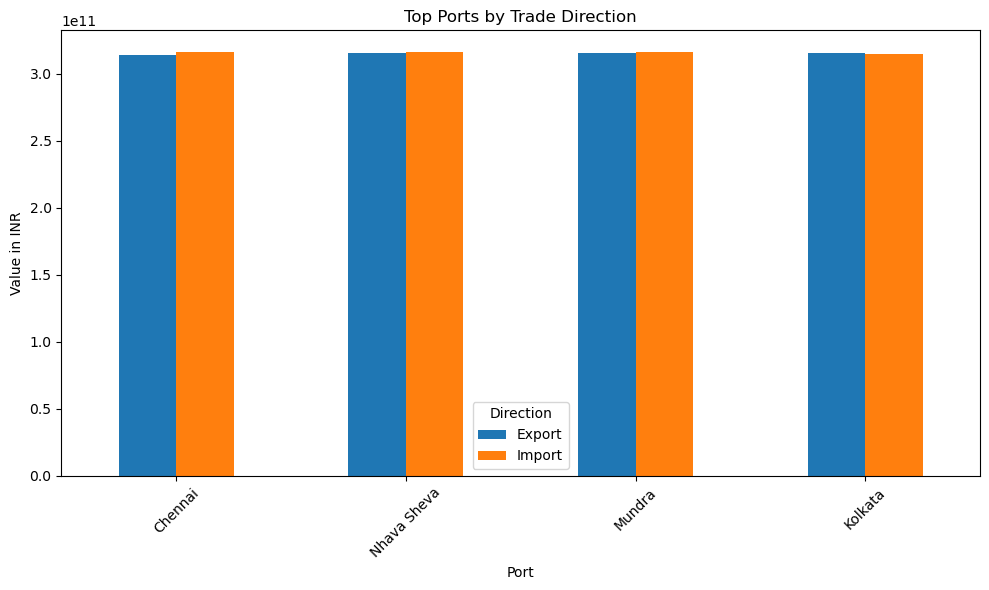

In [19]:
# Port usage by import/export
port_direction = df.groupby(['Port', 'Direction'])['Value_INR'].sum().unstack().fillna(0)

# Plot
port_direction.sort_values(by='Import', ascending=False).head(10).plot(kind='bar', title='Top Ports by Trade Direction', figsize=(10,6))
plt.ylabel("Value in INR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary by Product

In [20]:
product_summary = df.groupby('Product').agg({
    'Quantity': 'sum',
    'Value_INR': 'sum'
}).sort_values(by='Value_INR', ascending=False)

print(product_summary.head(10))

                  Quantity     Value_INR
Product                                 
Inverter         125341245  631675178407
UPS Battery      124955716  631544441373
Battery Charger  124993160  630405703383
Solar Panel      124911829  630285880699


# Summary by Country and Direction

In [21]:
country_summary = df.groupby(['Country', 'Direction']).agg({
    'Quantity': 'sum',
    'Value_INR': 'sum'
}).sort_values(by='Value_INR', ascending=False)

print(country_summary.head(10))

                      Quantity     Value_INR
Country    Direction                        
Bangladesh Import     50231224  253780357041
China      Import     50087095  253210993089
UAE        Import     50147334  253000666931
Germany    Import     50086484  252750724933
           Export     49970997  252463064823
Bangladesh Export     49961534  252409199340
USA        Export     50083880  252113828183
China      Export     50030152  252003529789
USA        Import     49931657  251294220963
UAE        Export     49671593  250884618770


# Export Processed Data

In [22]:
df.to_csv("cleaned_luminous_trade_data.csv", index=False)

# Export Summary Tables (Optional)

In [23]:
product_summary.to_csv("product_summary.csv")
country_summary.to_csv("country_direction_summary.csv")

# Value in USD

In [24]:
# Assuming INR to USD = Value_INR / Currency_Rate
df['Value_USD'] = df['Value_INR'] / df['Currency_Rate']
print(df[['Value_INR', 'Currency_Rate', 'Value_USD']].head())

   Value_INR  Currency_Rate     Value_USD
0    4171263          78.33  53252.432018
1    2126920          71.49  29751.293887
2     942853          70.03  13463.558475
3    2460477          80.31  30637.243183
4    4617296          83.74  55138.476236


# Monthly Trade Count and Value

In [25]:
monthly_summary = df.groupby(df['Date'].dt.to_period('M')).agg({
    'Quantity': 'sum',
    'Value_INR': 'sum'
})

print(monthly_summary.tail())

         Quantity     Value_INR
Date                           
2023-07  22224680  112606891214
2023-08  22296916  112891210958
2023-09  21590834  108939437568
2023-10  22424679  112125975672
2023-11  18337705   92266586576


# Time-based Insights

In [26]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Top 5 Products per Country

In [27]:
top_products_by_country = df.groupby(['Country', 'Product'])['Value_INR'].sum().reset_index()
top_products_by_country = top_products_by_country.sort_values(['Country', 'Value_INR'], ascending=[True, False])

# HS_Code Level Insights

<Axes: xlabel='HS_Code'>

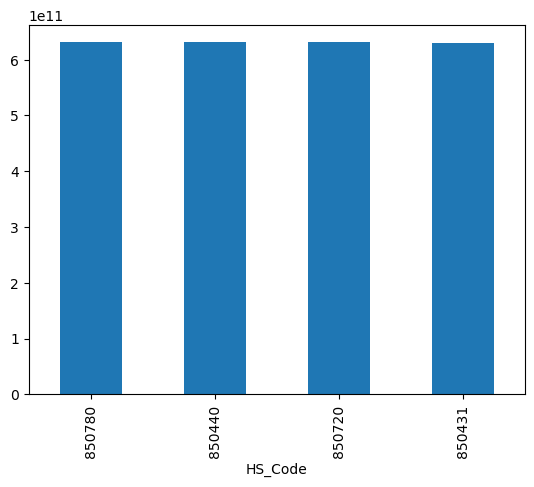

In [28]:
df.groupby('HS_Code')['Value_INR'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

# Export Data as Excel with Multiple Sheets

In [29]:
with pd.ExcelWriter("Luminous_Trade_Analysis_Report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Cleaned Data", index=False)
    product_summary.to_excel(writer, sheet_name="Product Summary")
    country_summary.to_excel(writer, sheet_name="Country Summary")

# Outlier Detection / Anomalies

In [30]:
# For example: trades with very high value
outliers = df[df['Value_INR'] > df['Value_INR'].quantile(0.99)]
print(outliers.head())

                    Date  HS_Code          Product Direction  Quantity  \
87   2022-01-01 01:27:00   850431  Battery Charger    Import       131   
206  2022-01-01 03:26:00   850780         Inverter    Export       523   
983  2022-01-01 16:23:00   850780      Solar Panel    Export       448   
1100 2022-01-01 18:20:00   850720      UPS Battery    Import       570   
1163 2022-01-01 19:23:00   850780      UPS Battery    Import       214   

      Value_INR     Port     Country  Currency_Rate    Month     Value_USD  \
87      4981710  Chennai       China          83.35  January  59768.566287   
206     4972694  Kolkata         UAE          72.84  January  68268.725975   
983     4950820  Kolkata         USA          74.10  January  66812.685560   
1100    4996788  Chennai     Germany          81.99  January  60943.871204   
1163    4999088  Kolkata  Bangladesh          77.13  January  64813.794892   

      Year  
87    2022  
206   2022  
983   2022  
1100  2022  
1163  2022  


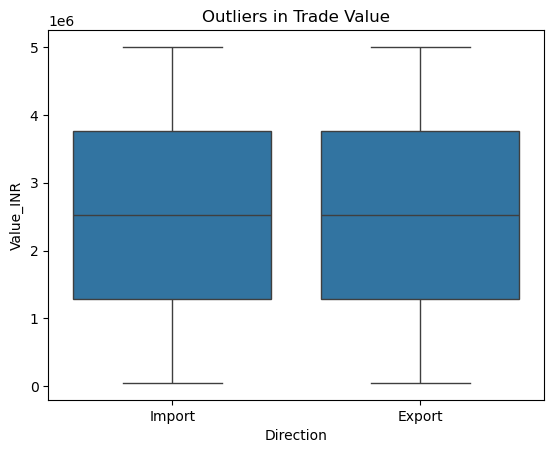

In [31]:
sns.boxplot(x='Direction', y='Value_INR', data=df)
plt.title("Outliers in Trade Value")
plt.show()

# Save Visualizations as Images for README / Report

In [32]:
plt.savefig("top_countries_trade_value.png")

<Figure size 640x480 with 0 Axes>

# Dashboard Using Streamlit (Web App)

In [33]:
pip install streamlit

In [34]:
# streamlit_app.py

import streamlit as st
import pandas as pd

# Load the data
df = pd.read_csv("luminous_trade_data.csv")

# Streamlit App
st.title("Luminous Trade Dashboard")
st.subheader("Overview of Uploaded Trade Data")
st.dataframe(df.head())

2025-06-29 12:31:20.586 
  command:

    streamlit run C:\Users\shiva\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

# Duplicate Data Handling

In [35]:
# Check and drop duplicates
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


# Correlation Matrix (Numerical Columns)

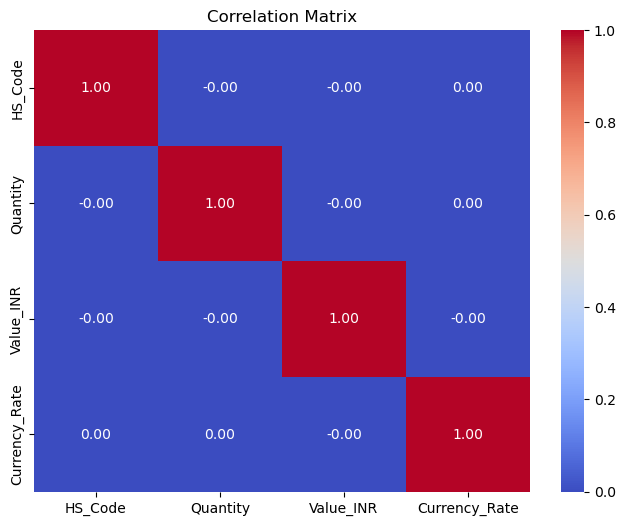

In [36]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Product-wise Trade Value

Available columns: ['date', 'hs_code', 'product', 'direction', 'quantity', 'value_inr', 'port', 'country', 'currency_rate']


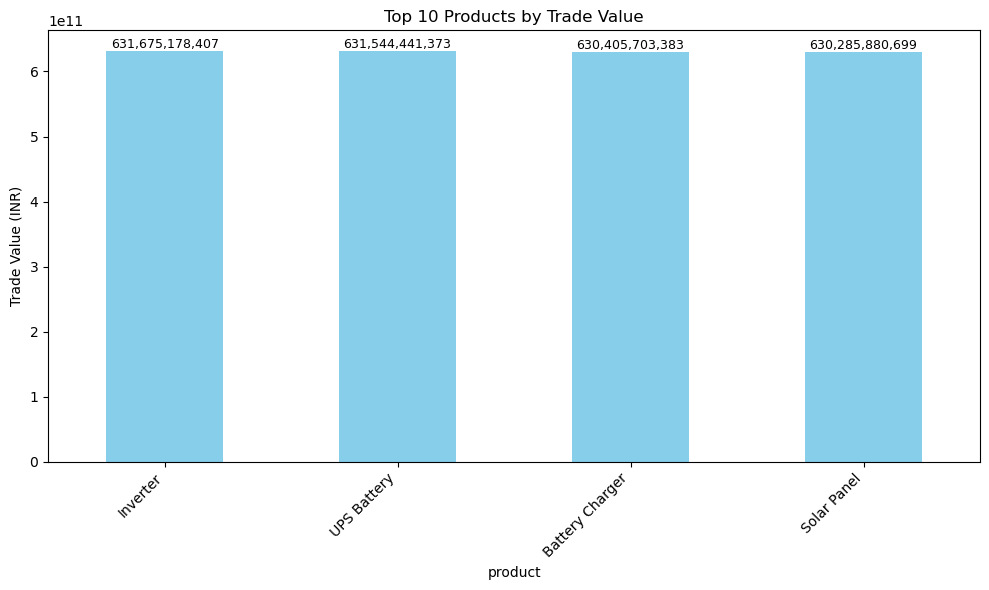

In [40]:
# Step 1: Clean column names
df.columns = df.columns.str.strip().str.lower()

# Step 2: Check available columns (optional but helpful for debugging)
print("Available columns:", df.columns.tolist())

# Step 3: Plot top 10 products by value_inr
if "product" in df.columns and "value_inr" in df.columns:
    top = df.groupby("product")["value_inr"].sum().nlargest(10)
    
    ax = top.plot(kind="bar", color="skyblue", figsize=(10, 6), title="Top 10 Products by Trade Value")
    plt.ylabel("Trade Value (INR)")
    plt.xticks(rotation=45, ha="right")
    
    for i, v in enumerate(top.values):
        ax.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print("'product' or 'value_inr' column not found.")


# Key Insights from the Trade Dataset:

India trades the most with: 🇧🇩 Bangladesh

Major port handling the highest trade value: ⚓ Mundra

Peak month for trade activity: 📈 August

Most traded product by value: 🔋 Inverter